In [1]:
from pycsbwrapper import CSB
from matplotlib import pyplot as plt

import pandas as pd

# Datu ielādes paraugs

Izmantosim CSB klasi, lai iegūtu un attēlotu indiešu skaitu Latvijā.

In [9]:
csb = CSB('lv', 'POP', 'IR', 'IRE', 'IRE010')
csb.set_query(ETHNICITY=['E_IND'],
    TIME = [str(i) for i in range(2010, 2026)])
csb.get_query()

{'query': [{'code': 'ETHNICITY',
   'selection': {'filter': 'item', 'values': ['E_IND']}},
  {'code': 'TIME',
   'selection': {'filter': 'item',
    'values': ['2011',
     '2012',
     '2013',
     '2014',
     '2015',
     '2016',
     '2017',
     '2018',
     '2019',
     '2020',
     '2021',
     '2022',
     '2023',
     '2024',
     '2025']}}],
 'response': {'format': 'json'}}

In [11]:
scb_data = csb.get_data(return_text=True)
scb_data

{'columns': [{'code': 'ETHNICITY', 'text': 'Tautība', 'type': 'd'},
  {'code': 'TIME', 'text': 'Laika periods', 'type': 't'},
  {'code': 'Iedzīvotāji pēc tautības gada sākumā',
   'text': 'Iedzīvotāji pēc tautības gada sākumā',
   'type': 'c'}],
 'comments': [],
 'data': [{'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2011', 'text': '2011'}],
   'values': ['59']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2012', 'text': '2012'}],
   'values': ['57']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2013', 'text': '2013'}],
   'values': ['68']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2014', 'text': '2014'}],
   'values': ['70']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2015', 'text': '2015'}],
   'values': ['101']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2016', 'text': '2016'}],
   'values': ['141']},
  {'key': [{'code': 'E_IND', 'text': 'Indieši'},
    {'code': '2017

In [12]:
scb_fetch = scb_data['data']
scb_fetch

[{'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2011', 'text': '2011'}],
  'values': ['59']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2012', 'text': '2012'}],
  'values': ['57']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2013', 'text': '2013'}],
  'values': ['68']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2014', 'text': '2014'}],
  'values': ['70']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2015', 'text': '2015'}],
  'values': ['101']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2016', 'text': '2016'}],
  'values': ['141']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2017', 'text': '2017'}],
  'values': ['186']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2018', 'text': '2018'}],
  'values': ['661']},
 {'key': [{'code': 'E_IND', 'text': 'Indieši'},
   {'code': '2019', 'text': '2019'}],
  'values': ['1137']},
 {'key': [{'code': 'E_IND', 'te

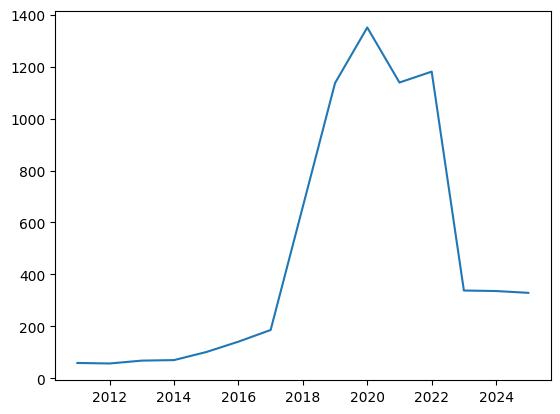

In [ ]:
df = pd.DataFrame([(int(row['key'][1]['code']), int(row['values'][0]))
                   for row in scb_fetch],
                  columns=['year', 'population'])
plt.plot(df['year'], df['population']);


# Hierarhiskā navigācija

CSB ļauj pārvietoties pa stat.gov.lv direktoriju.

In [16]:
csb = CSB('lv')
csb.info()

[{'id': 'POP', 'type': 'l', 'text': 'Iedzīvotāji'},
 {'id': 'EMP', 'type': 'l', 'text': 'Darbs'},
 {'id': 'VES', 'type': 'l', 'text': 'Sociālā aizsardzība un veselība'},
 {'id': 'IZG', 'type': 'l', 'text': 'Izglītība, kultūra un zinātne'},
 {'id': 'VEK', 'type': 'l', 'text': 'Valsts un ekonomika'},
 {'id': 'TIR', 'type': 'l', 'text': 'Tirdzniecība un pakalpojumi'},
 {'id': 'ENT', 'type': 'l', 'text': 'Uzņēmējdarbība'},
 {'id': 'IKT', 'type': 'l', 'text': 'Informācijas tehnoloģijas'},
 {'id': 'NOZ', 'type': 'l', 'text': 'Nozares'},
 {'id': 'ENV', 'type': 'l', 'text': 'Vide'},
 {'id': 'FIN', 'type': 'l', 'text': 'Labklājības un vienlīdzības rādītāji'}]

In [17]:
csb.go_down('POP')
csb.info()

[{'id': 'IR',
  'type': 'l',
  'text': 'Iedzīvotāju skaits un raksturojošie rādītāji'},
 {'id': 'ID', 'type': 'l', 'text': 'Dzimstība'},
 {'id': 'IM', 'type': 'l', 'text': 'Mirstība'},
 {'id': 'NC', 'type': 'l', 'text': 'Nāves cēloņi'},
 {'id': 'IL', 'type': 'l', 'text': 'Laulības'},
 {'id': 'IB', 'type': 'l', 'text': 'Migrācija'},
 {'id': 'PM', 'type': 'l', 'text': 'Patvēruma meklētāji un bēgļi'},
 {'id': 'MV', 'type': 'l', 'text': 'Privāto mājsaimniecību un ģimeņu skaits'},
 {'id': 'MI', 'type': 'l', 'text': 'Mājsaimniecību un iedzīvotāju ienākumi'},
 {'id': 'MB', 'type': 'l', 'text': 'Mājsaimniecību izdevumi un patēriņš'},
 {'id': 'NN',
  'type': 'l',
  'text': 'Monetārā nabadzība, nevienlīdzība un sociālā atstumtība'},
 {'id': 'MA', 'type': 'l', 'text': 'Mājokļi'},
 {'id': 'NO', 'type': 'l', 'text': 'Noziegumi, apsūdzētie un cietušie'},
 {'id': 'TS', 'type': 'l', 'text': 'Tiesu sistēma un ieslodzījuma vietas'},
 {'id': 'UG', 'type': 'l', 'text': 'Ugunsgrēki un glābšanas darbi'}]

In [18]:
csb.go_down('MA')
csb.info()

[{'id': 'MAS', 'type': 'l', 'text': 'Mājokļu skaits un veids'},
 {'id': 'MAA', 'type': 'l', 'text': 'Mājokļa apstākļi (EU-SILC)'},
 {'id': 'MAI', 'type': 'l', 'text': 'Izdevumi mājokļa uzturēšanai (EU-SILC)'},
 {'id': 'A_MA', 'type': 'l', 'text': 'Arhīvs - mājokļi'}]

In [19]:
csb.go_down('MAA')
csb.info()

[{'id': 'MAA010',
  'type': 't',
  'text': 'Mājsaimniecību īpatsvars, kas norādījušas atsevišķas problēmas saistībā ar sava mājokļa vidi (procentos) 2005 - 2023',
  'updated': '2024-05-22T11:20:00'},
 {'id': 'MAA020',
  'type': 't',
  'text': 'Mājokļu vispārējais raksturojums 2005 - 2024',
  'updated': '2025-03-03T13:00:00'},
 {'id': 'MAA030',
  'type': 't',
  'text': 'Mājokļa veids (procentos) 2005 - 2024',
  'updated': '2025-03-03T13:00:00'},
 {'id': 'MAA040',
  'type': 't',
  'text': 'Mājokļu labiekārtotība (procentos) 2008 - 2024',
  'updated': '2025-03-03T13:00:00'}]

In [20]:
csb.go_down('MAA020')
csb.info()

{'title': 'Mājokļu vispārējais raksturojums - Rādītāji, Mājokļa raksturojums un Laika periods',
 'variables': [{'code': 'INDICATOR',
   'text': 'Rādītāji',
   'values': ['ALL',
    'A1_CH',
    'A1_16_64',
    'A1_GE65',
    'A2_NCH',
    'A2_1CH',
    'A2_2CH',
    'A2_GE3CH',
    'LV',
    'LV00A',
    'LV006',
    'LV007',
    'LV00C',
    'LV008',
    'LV00B',
    'LV003',
    'LV009',
    'LV005',
    'LV0001000',
    'RURAL',
    'URBAN'],
   'valueTexts': ['Pavisam',
    'Viens pieaugušais ar bērniem',
    'Viena persona (16-64 gadi)',
    'Viena persona (65 gadi un vairāk)',
    'Pāris bez bērniem',
    'Pāris ar vienu bērnu',
    'Pāris ar diviem bērniem',
    'Pāris ar trīs vai vairāk bērniem',
    'Latvija',
    'Rīgas statistiskais reģions (no 01.01.2024.)',
    'Rīgas statistiskais reģions (Rīga) (līdz 01.01.2024.)',
    'Pierīgas statistiskais reģions (līdz 01.01.2024.)',
    'Vidzemes statistiskais reģions (no 01.01.2024.)',
    'Vidzemes statistiskais reģions (līdz 01.0

Ja codes=True vai codes nav norādīts, tad atgriež kodus pēc noklusējuma

In [32]:
csb.get_variables()['INDICATOR']


['ALL',
 'A1_CH',
 'A1_16_64',
 'A1_GE65',
 'A2_NCH',
 'A2_1CH',
 'A2_2CH',
 'A2_GE3CH',
 'LV',
 'LV00A',
 'LV006',
 'LV007',
 'LV00C',
 'LV008',
 'LV00B',
 'LV003',
 'LV009',
 'LV005',
 'LV0001000',
 'RURAL',
 'URBAN']

Ja codes=False atgriež nosaukumus

In [33]:
csb.get_variables(codes=False)['INDICATOR']

['Pavisam',
 'Viens pieaugušais ar bērniem',
 'Viena persona (16-64 gadi)',
 'Viena persona (65 gadi un vairāk)',
 'Pāris bez bērniem',
 'Pāris ar vienu bērnu',
 'Pāris ar diviem bērniem',
 'Pāris ar trīs vai vairāk bērniem',
 'Latvija',
 'Rīgas statistiskais reģions (no 01.01.2024.)',
 'Rīgas statistiskais reģions (Rīga) (līdz 01.01.2024.)',
 'Pierīgas statistiskais reģions (līdz 01.01.2024.)',
 'Vidzemes statistiskais reģions (no 01.01.2024.)',
 'Vidzemes statistiskais reģions (līdz 01.01.2024.)',
 'Kurzemes statistiskais reģions (no 01.01.2024.)',
 'Kurzemes statistiskais reģions (līdz 01.01.2024.)',
 'Zemgales statistiskais reģions',
 'Latgales statistiskais reģions',
 'Rīga',
 'Lauku teritorijas',
 'Pilsētas']